In [1]:
train_dir = '/home/rama/Documents/cats_and_dogs_small/train'
test_dir = '/home/rama/Documents/cats_and_dogs_small/test'
validation_dir = '/home/rama/Documents/cats_and_dogs_small/validation'

In [2]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.


In [3]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [4]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

## Data Pre-Processing

In [5]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                train_dir,
                target_size = (150,150),
                batch_size = 20,
                class_mode = 'binary')
validation_generator = test_datagen.flow_from_directory(
                validation_dir,
                target_size = (150,150),
                batch_size = 20,
                class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
history = model.fit(train_generator,
                   steps_per_epoch=100,
                   epochs=30,
                   validation_data=validation_generator,
                   validation_steps=50)

Epoch 1/30
100/100 [==============================] - 79s 789ms/step - loss: 0.7439 - acc: 0.5170 - val_loss: 0.6837 - val_acc: 0.5330
Epoch 2/30
100/100 [==============================] - 79s 792ms/step - loss: 0.7059 - acc: 0.5445 - val_loss: 0.6716 - val_acc: 0.6070
Epoch 3/30
100/100 [==============================] - 79s 791ms/step - loss: 0.6519 - acc: 0.6215 - val_loss: 0.6827 - val_acc: 0.6590
Epoch 4/30
100/100 [==============================] - 80s 801ms/step - loss: 0.5889 - acc: 0.6905 - val_loss: 0.6999 - val_acc: 0.7030
Epoch 5/30
100/100 [==============================] - 80s 796ms/step - loss: 0.5428 - acc: 0.7170 - val_loss: 0.5586 - val_acc: 0.7020
Epoch 6/30
100/100 [==============================] - 79s 792ms/step - loss: 0.5133 - acc: 0.7525 - val_loss: 0.6417 - val_acc: 0.7400
Epoch 7/30
100/100 [==============================] - 79s 792ms/step - loss: 0.4759 - acc: 0.7690 - val_loss: 0.7471 - val_acc: 0.7300
Epoch 8/30
100/100 [==============================] - 8

In [7]:
model.save('cats_and_dogs.h5')

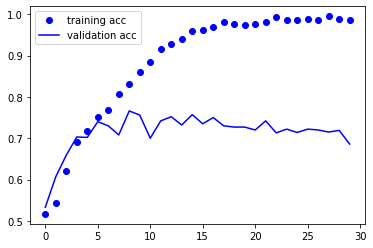

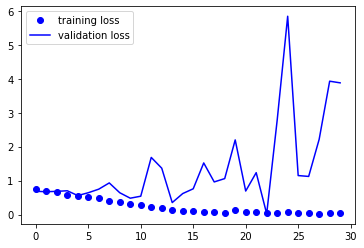

In [9]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label = 'training acc')
plt.plot(epochs, val_acc, 'b', label = 'validation acc')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label = 'training loss')
plt.plot(epochs, val_loss, 'b', label = 'validation loss')
plt.legend()
plt.show()

Clearly model is OverFitting 

## Using Data augmentation

In [10]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

In [12]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

In [13]:
train_datagen = ImageDataGenerator(
                rescale=1./255,
                rotation_range=40,
                width_shift_range=0.2,
                height_shift_range=0.2,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                train_dir,
                target_size = (150, 150),
                batch_size = 32,
                class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
                validation_dir,
                target_size = (150, 150),
                batch_size = 32,
                class_mode = 'binary')

history = model.fit(train_generator,
                   epochs=30,
                   steps_per_epoch=100,
                   validation_data=validation_generator,
                   validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 110s 1s/step - loss: 0.7219 - acc: 0.5155 - val_loss: 0.6823 - val_acc: 0.5006
Epoch 2/30
100/100 [==============================] - 108s 1s/step - loss: 0.7065 - acc: 0.5597 - val_loss: 0.6371 - val_acc: 0.6385
Epoch 3/30
100/100 [==============================] - 109s 1s/step - loss: 0.6782 - acc: 0.6275 - val_loss: 0.7121 - val_acc: 0.6555
Epoch 4/30
100/100 [==============================] - 109s 1s/step - loss: 0.6589 - acc: 0.6461 - val_loss: 0.6404 - val_acc: 0.6611
Epoch 5/30
100/100 [==============================] - 108s 1s/step - loss: 0.6393 - acc: 0.6504 - val_loss: 0.6920 - val_acc: 0.6307
Epoch 6/30
100/100 [==============================] - 110s 1s/step - loss: 0.6273 - acc: 0.6520 - val_loss: 0.5776 - val_acc: 0.6978
Epoch 7/30
100/100 [==============================] - 108s 1s/step - loss: 0.6253 - acc: 0.6578 - val_loss: 0.6168 - v

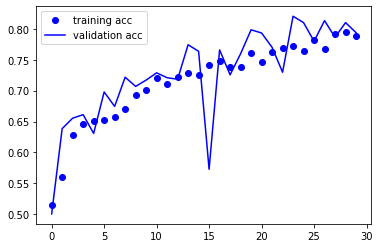

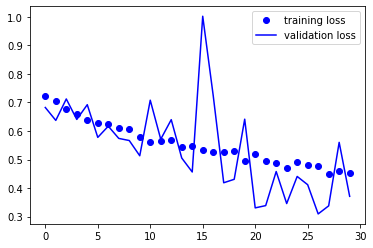

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label = 'training acc')
plt.plot(epochs, val_acc, 'b', label = 'validation acc')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label = 'training loss')
plt.plot(epochs, val_loss, 'b', label = 'validation loss')
plt.legend()
plt.show()

In [15]:
model.save('cats_and_dogs1.h5')